<a href="https://colab.research.google.com/github/franz6ko/analisis-datos/blob/master/TINELLI_TP_Integrador_An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install funpymodeling

In [ ]:
!pip install geopy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import funpymodeling as fp
from geopy.geocoders import Nominatim
import re
import calendar
from math import radians

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

## Desarrollo

### 1. Análisis exploratorio inicial
Visualizar las primeras filas.
Realizar un resumen de 5 números.
Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
Identificar las variables de entrada y de salida del problema.
Variables de entrada:
Realizar los siguientes análisis por tipo de variable.
Numéricas:
Obtener conclusiones acerca de la distribución de los datos.
Categóricas
Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
Variables de salida:
¿Están balanceadas las clases?
¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [ ]:
# Importar dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/weatherAUS.csv")
df.head(5).T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Variables numéricas

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10), bins=20)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

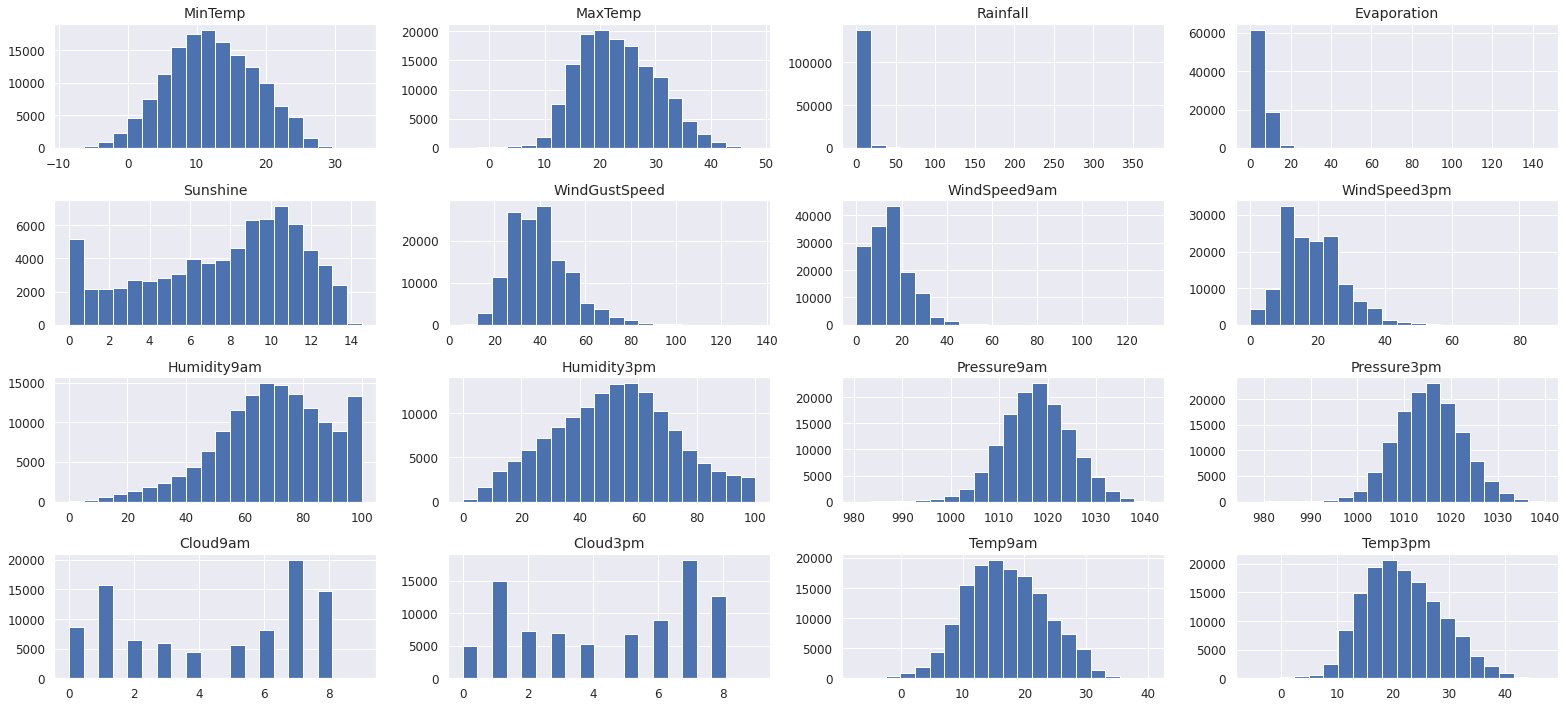

In [ ]:
display_dataset_distributions(df)

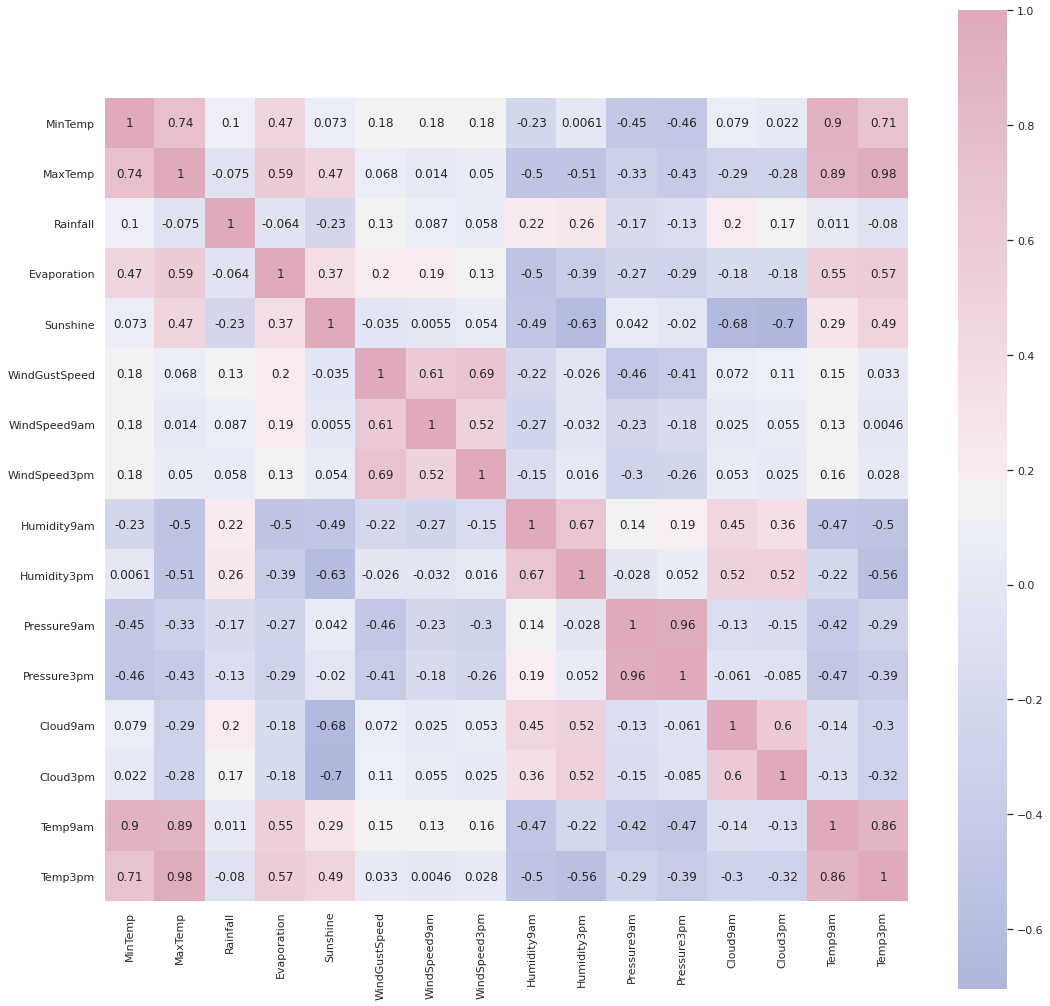

In [ ]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

Como se observa a continuación, y como es lógico suponer, los valores de temperatura (MinTemp, MaxTemp, Temp9am, Temp3pm) presentan una correlación positiva entre ellos.

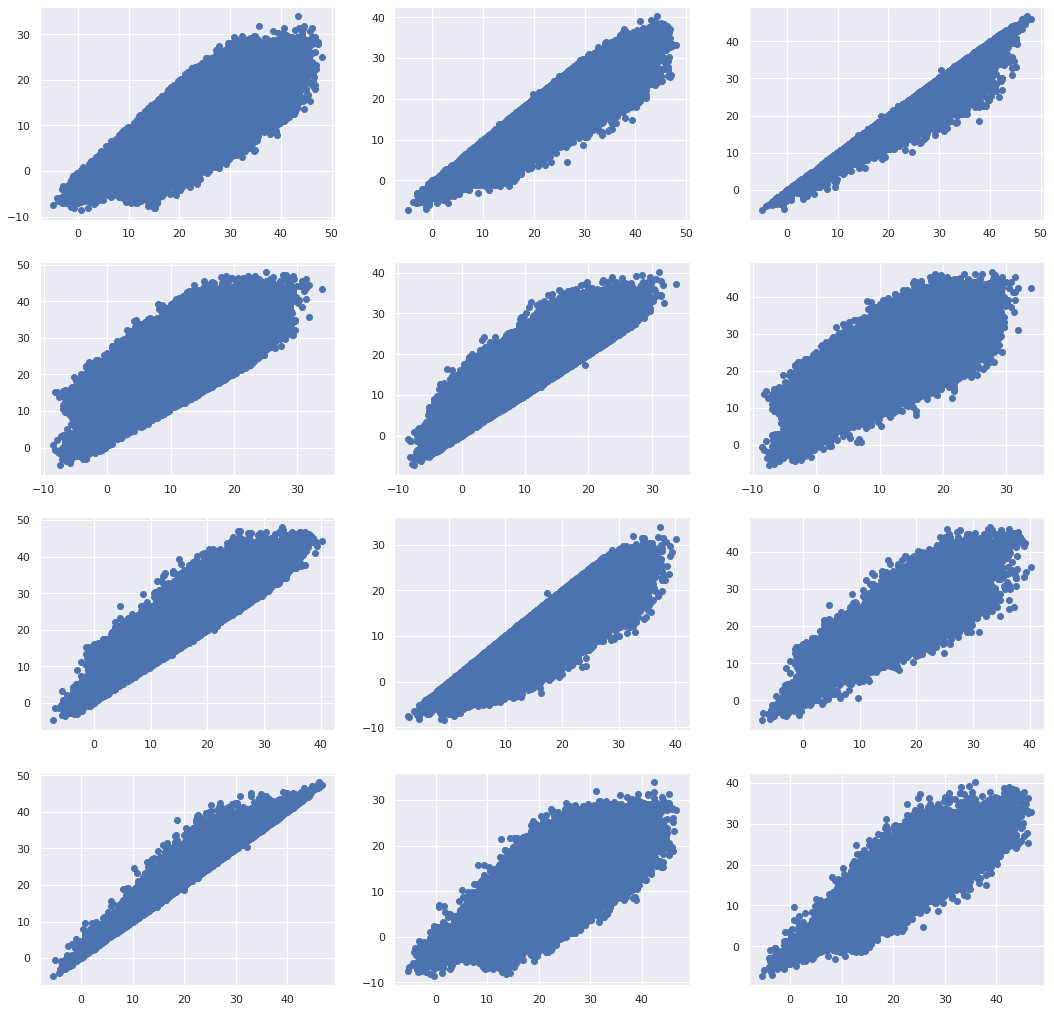

In [ ]:
# Correlación entre las variables de temperatura (MaxTemp, MinTemp, Temp9am, Temp3pm)
fig, ax = plt.subplots(4, 3, figsize=(18,18))
ax[0,0].scatter(df['MaxTemp'], df['MinTemp'])
ax[0,1].scatter(df['MaxTemp'], df['Temp9am'])
ax[0,2].scatter(df['MaxTemp'], df['Temp3pm'])
ax[1,0].scatter(df['MinTemp'], df['MaxTemp'])
ax[1,1].scatter(df['MinTemp'], df['Temp9am'])
ax[1,2].scatter(df['MinTemp'], df['Temp3pm'])
ax[2,0].scatter(df['Temp9am'], df['MaxTemp'])
ax[2,1].scatter(df['Temp9am'], df['MinTemp'])
ax[2,2].scatter(df['Temp9am'], df['Temp3pm'])
ax[3,0].scatter(df['Temp3pm'], df['MaxTemp'])
ax[3,1].scatter(df['Temp3pm'], df['MinTemp'])
ax[3,2].scatter(df['Temp3pm'], df['Temp9am']);

De igual manera lo hacen las variables relacionadas con la velocidad del viento.

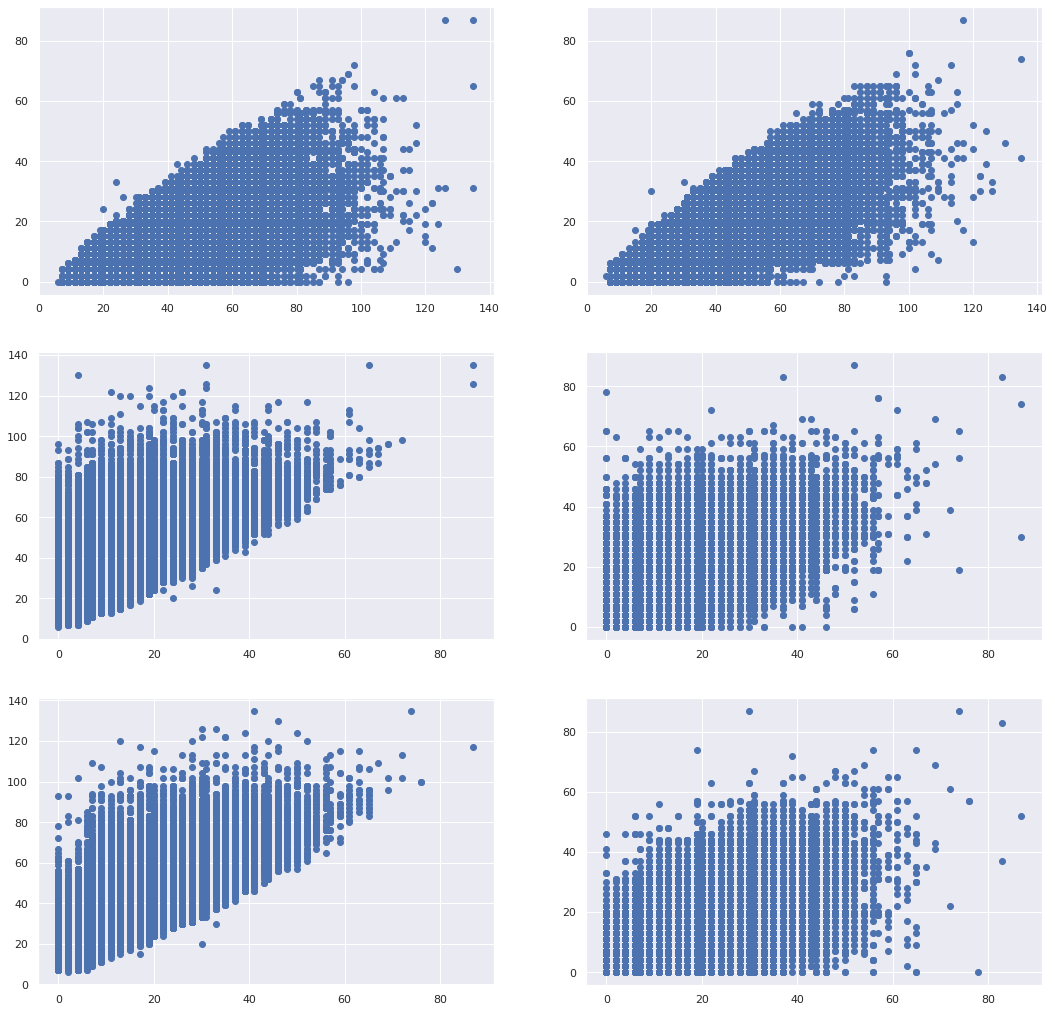

In [ ]:
# Correlación entre las variables de velocidad del viento (WindGustSpeed, WindSpeed9am, WindSpeed3pm)
fig, ax = plt.subplots(3, 2, figsize=(18,18))
ax[0,0].scatter(df['WindGustSpeed'], df['WindSpeed9am'])
ax[0,1].scatter(df['WindGustSpeed'], df['WindSpeed3pm'])
ax[1,0].scatter(df['WindSpeed9am'], df['WindGustSpeed'])
ax[1,1].scatter(df['WindSpeed9am'], df['WindSpeed3pm'])
ax[2,0].scatter(df['WindSpeed3pm'], df['WindGustSpeed'])
ax[2,1].scatter(df['WindSpeed3pm'], df['WindSpeed9am']);

Se observa también una correlación negativa entre la variable relacionada con la luz solar y las variables de nubosidad, como es de esperar.

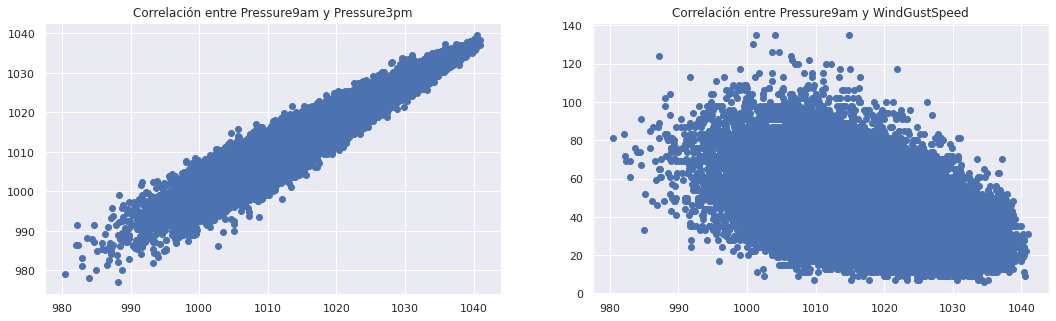

In [ ]:
# Correlación entre las variables de presion y velocidad del viento (Pressure9am, Pressure3pm, WindGustSpeed)
fig, ax = plt.subplots(1, 2, figsize=(18,5))
ax[0].scatter(df['Pressure9am'], df['Pressure3pm'])
ax[0].set_title("Correlación entre Pressure9am y Pressure3pm")
ax[1].scatter(df['Pressure9am'], df['WindGustSpeed'])
ax[1].set_title("Correlación entre Pressure9am y WindGustSpeed");

#### Variables categóricas

In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
Date,145460,3436,2015-01-18,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


In [ ]:
# Ubicaciones en Australia
print(df['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


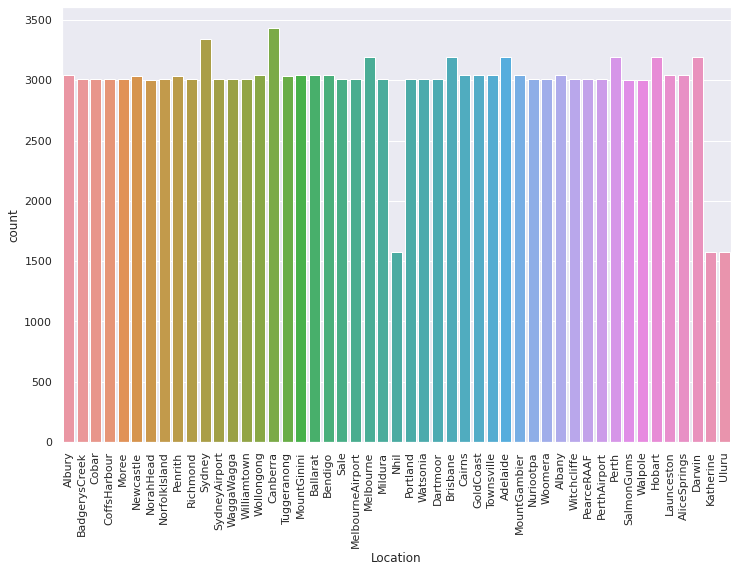

In [ ]:
# Cantidad de muestras por ubicación
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.countplot(df['Location'], ax = ax)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Valores de dirección del viento
print(df['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']


#### Variables compuestas

In [ ]:
df_date = pd.to_datetime(df['Date'])

print("Min: " + str(df_date.min()))
print("Max: " + str(df_date.max()))

Min: 2007-11-01 00:00:00
Max: 2017-06-25 00:00:00


#### Valores faltantes

In [ ]:
fp.status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Date,0,0.000000,0,0.000000,3436,object
1,Location,0,0.000000,0,0.000000,49,object
2,MinTemp,1485,0.010209,159,0.001093,389,float64
3,MaxTemp,1261,0.008669,14,0.000096,505,float64
4,Rainfall,3261,0.022419,91080,0.626152,681,float64
5,Evaporation,62790,0.431665,244,0.001677,358,float64
6,Sunshine,69835,0.480098,2359,0.016218,145,float64
7,WindGustDir,10326,0.070989,0,0.000000,16,object
8,WindGustSpeed,10263,0.070555,0,0.000000,67,float64
9,WindDir9am,10566,0.072639,0,0.000000,16,object


#### Variable de salida

La variable de salida es la última columna del dataset la cual indica si lloverá al día siguiente con los valores "Yes" y "No".

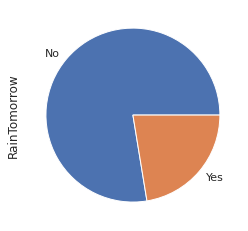

In [ ]:
df['RainTomorrow'].value_counts().plot.pie();

Como se observa en el gráfico superior, las clases están desbalanceadas. Idealmente, para entrenar, nuestro dataset debería tener aproximadamente la misma cantidad de casos "Yes" como de casos "No".

Para codificar la variable de salida, se transformarán los valores "Yes"/"No" a 1/0 respectivamente.

### 2. Esquema de validación de resultados

In [ ]:
# Eliminar muestras con valor de salida NaN
df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
# Variables de entrada
X = df.drop('RainTomorrow', 1, inplace=False)

# Variables de salida
y = df['RainTomorrow']

In [ ]:
# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2, stratify=y)

### 3. Limpieza y preparación de datos / ingeniería de features

#### Datos faltantes por categoría

In [ ]:
# Mostrar cantidad de datos faltantes por categoría
fp.status(df).sort_values('q_nan', ascending=False)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
6,Sunshine,67816,0.476929,2308,0.016231,145,float64
5,Evaporation,60843,0.427890,240,0.001688,356,float64
18,Cloud3pm,57094,0.401525,4957,0.034861,10,float64
17,Cloud9am,53657,0.377353,8587,0.060390,10,float64
15,Pressure9am,14014,0.098556,0,0.000000,546,float64
16,Pressure3pm,13981,0.098324,0,0.000000,549,float64
9,WindDir9am,10013,0.070418,0,0.000000,16,object
7,WindGustDir,9330,0.065615,0,0.000000,16,object
8,WindGustSpeed,9270,0.065193,0,0.000000,67,float64
10,WindDir3pm,3778,0.026570,0,0.000000,16,object


#### Supuestos sobre datos faltantes

In [ ]:
df.groupby('Location')[['Sunshine','Evaporation']].count().T

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
Sunshine,1698,2510,0,2520,0,0,0,3113,2562,1512,550,1491,2501,3189,0,3174,0,0,2434,3008,2875,2053,2597,0,0,0,0,2570,2845,2757,0,3188,3004,2555,0,1818,0,3321,2989,2616,0,0,2575,0,2998,1351,0,0,2003
Evaporation,1649,2736,0,2820,0,0,1185,3142,2647,1823,2659,1781,2535,3138,0,3181,1473,141,2435,3006,2890,2236,2630,0,0,0,0,2756,2880,0,0,3192,3008,2589,1596,1834,0,3286,2959,2944,0,0,2853,0,2996,1786,0,0,2564


In [ ]:
df.groupby('Location')[['Cloud3pm','Cloud9am']].count().T

Location,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
Cloud3pm,0,2321,1415,2673,0,1987,2267,3159,2782,2164,2687,2222,0,3189,0,2021,849,736,1968,3008,2859,2490,2922,0,2095,0,0,2906,2237,1735,0,3189,3005,2478,580,2613,0,2776,3005,2759,0,408,2818,0,2998,2042,0,1398,2338
Cloud9am,0,2981,1282,2699,0,2484,2070,3160,2803,2352,2619,2187,0,3191,0,2026,1522,720,2029,3009,2923,2371,2924,0,2774,0,0,2903,2875,1816,0,3191,3007,2587,603,2645,0,2771,3001,2861,0,338,2769,0,2999,2095,0,1322,2627


In [ ]:
df[(df['Location'] == 'BadgerysCreek') & (~df['Cloud3pm'].isnull())].shape[0]

0

Como se aprecia en los snippets superiores, hay ciudades que registran datos faltantes en todas sus muestras para algunas categorías (ej. Sunshine). Esto podría deberse a que la estación de adquisición de datos de la ciudad no cuenta con el sensor específico para sensar esa variable.

#### Imputación de datos faltantes

In [ ]:
# Cacular cantidad de muestas con al menos un dato faltante
p_nan = round(100 * X_train[X_train.isnull().sum(axis = 1)>0].shape[0] / X_train.shape[0],2)
print("Porcentaje de muestras con al menos un dato faltante: " + str(p_nan) + "%")

Porcentaje de muestras con al menos un dato faltante: 60.35%


In [ ]:
# Tratar muestras con valores faltantes
def treat_missing_values(X, y):

  # Retener solo muestras completas (Mejores resultados)
  idx = X.isnull().sum(axis = 1) == 0
  X = X[idx]
  y = y[idx]
  return X,y

  # Eliminar features que presentan un número muy alto de NaNs
  # cols = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']
  # X = X.drop(cols, 1, inplace=False)

  # Reemplazar variables numericas faltantes por la media y categóricas por la moda
  # for label, content in X.items():
  #   if pd.api.types.is_numeric_dtype(content):
  #       if pd.isnull(content).sum():
  #           X[label] = content.fillna(content.median())
  #   if not pd.api.types.is_numeric_dtype(content):
  #       if pd.isnull(content).sum():
  #           X[label] = pd.Categorical(content).codes
  #           X[label] = content.fillna(content.mode()[0])
  # return X,y

X_train, y_train = treat_missing_values(X_train, y_train)

#### Codificación

##### Ubicación

Para codificar la ubicación, se transformará la variable categórica en dos variables numéricas correspondientes a la latitud y longitud. Para ello, se utiliza la API Nominatim de OpenStreetMaps.

In [ ]:
# Location encoding
geolocator = Nominatim(timeout=10, user_agent = "dlab.berkeley.edu-workshop")
cities = X_train['Location'].unique()

city2latlon = {}
citiesNotFound = []

print("Fetching data from API...")

for city in cities:
  location = geolocator.geocode(re.sub(r"(?<![A-Z])(?<!^)([A-Z])",r" \1", city) + ' AU')
  if location is None:
    city2latlon[city] = None
    citiesNotFound.append(city)
  else:
    city2latlon[city] = (location.latitude, location.longitude)

print(str(len(city2latlon)-len(citiesNotFound)) + " cities found.")
print(str(len(citiesNotFound)) + " cities not found.")

if len(citiesNotFound) > 0:
  print("Cities not found: " + str(citiesNotFound))

print("Done.")

Fetching data from API...
26 cities found.
0 cities not found.
Done.


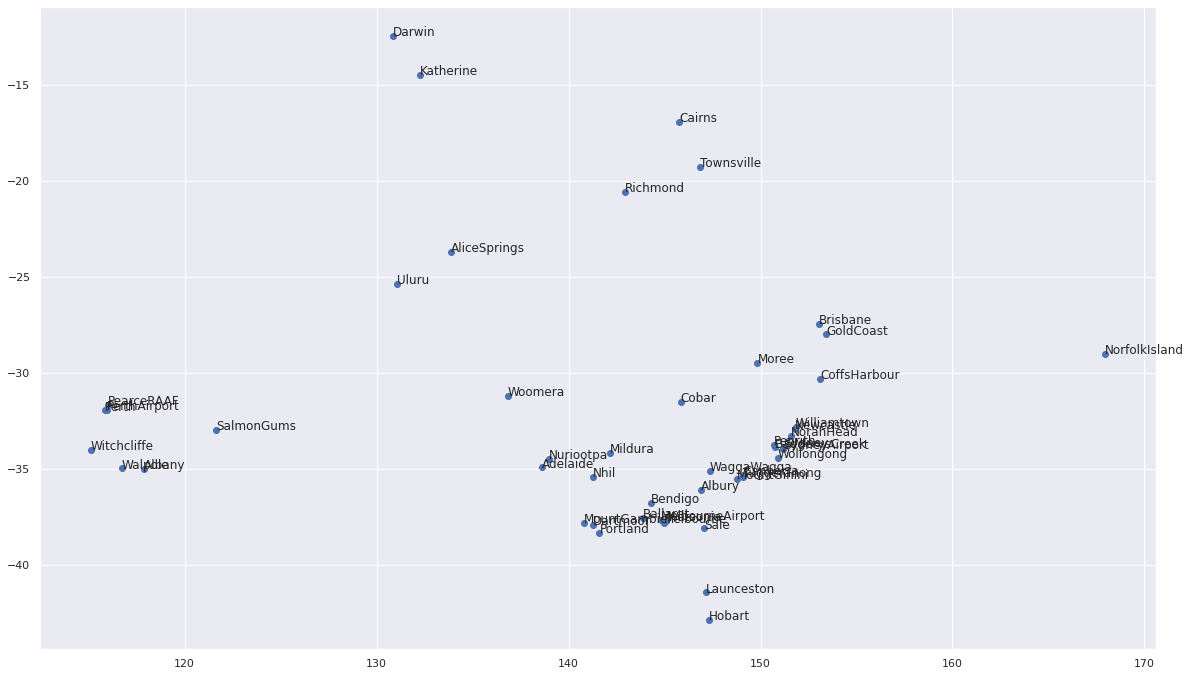

In [ ]:
# Graficar ubicación de las ciudades
cits = [key for key in city2latlon]
lats = [city2latlon[key][0] for key in city2latlon]
lons = [city2latlon[key][1] for key in city2latlon]

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(lons, lats);
for i, txt in enumerate(cits):
    ax.annotate(txt, (lons[i], lats[i]))
ax.set_aspect('equal', 'box')

In [ ]:
def location_encoding(X):
  X['lat'] = X.apply(lambda row : city2latlon[row['Location']][0], axis = 1)
  X['lon'] = X.apply(lambda row : city2latlon[row['Location']][1], axis = 1)
  X.drop('Location', 1, inplace=True)

location_encoding(X_train)

##### Viento

Para codificar el viento, se transformarán las siglas de dirección en los valores de ángulo sexagesimal correspondiente tomando como referencia 0º el este. Se puede optar a continuación por 3 opciones:

1.   Conservar el ángulo
2.   Conservar el seno y el coseno del ángulo en 2 features
3.   Fusionar seno y coseno con la velocidad del viento corespondiente

In [ ]:
# Wind direction encoding
def wind_dir_encoding(X):
  cols = ['WindGustDir','WindDir9am','WindDir3pm']

  dirs = ['E','ENE','NE','NNE','N','NNW','NW','WNW','W','WSW','SW','SSW','S','SSE','SE','ESE']
  degs = np.arange(len(dirs))*360/16

  dir2deg = { dirs[i] : degs[i] for i in range(len(dirs)) }

  for col in cols:
      # Guardar sólo el ángulo 
      # X[col] = X.apply(lambda row : dir2deg[row[col]], axis = 1)

      # Guardar seno y coseno
      X[col + 'X'] = X.apply(lambda row : np.cos(radians(dir2deg[row[col]])), axis = 1)
      X[col + 'Y'] = X.apply(lambda row : np.sin(radians(dir2deg[row[col]])), axis = 1)
      X.drop(col, 1, inplace=True)

      # Fusionar dirección y velocidad para guardar velocidad en X e Y
      # X[col.replace('Dir','') + 'X'] = X.apply(lambda row : row[col.replace('Dir','Speed')] * np.cos(radians(dir2deg[row[col]])), axis = 1)
      # X[col.replace('Dir','') + 'Y'] = X.apply(lambda row : row[col.replace('Dir','Speed')] * np.sin(radians(dir2deg[row[col]])), axis = 1)
      # X.drop(col.replace('Dir','Speed'), 1, inplace=True)
      # X.drop(col, 1, inplace=True)

wind_dir_encoding(X_train)

##### Fecha

Se conservará únicamente el mes ya que es conocido que la estación del año tienen una correlación con la cantidad de días de lluvia.

In [ ]:
# Conservar solo el mes de la fecha
def date_encoding(X):
  X['Date'] = pd.to_datetime(X['Date'])
  X['Month'] = X['Date'].dt.month
  X.drop(['Date'], 1, inplace=True)

  # degs = np.arange(12)*360/12
  # X['MonthX'] = X.apply(lambda row : np.cos(radians(degs[row['Month']-1])), axis = 1)
  # X['MonthY'] = X.apply(lambda row : np.sin(radians(degs[row['Month']-1])), axis = 1)
  # X.drop('Month', 1, inplace=True)

date_encoding(X_train)

##### One Hot Encoding

Se utiliza One Hot Encoding para codificar las variables categóricas

In [ ]:
# Codificación de variables categóricas
cols = ['Month']

ohe_encoder = OneHotEncoder(categories='auto', drop=None, sparse=False)
ohe_encoder.fit(X_train[cols].values)
cat_names = np.concatenate(ohe_encoder.categories_).ravel()

def one_hot_encoding(X):
  X_encoded = ohe_encoder.transform(X[cols].values)
  new_df = pd.DataFrame(X_encoded,columns=cat_names).astype(int)
  X.drop(cols, 1, inplace=True)
  X = pd.concat([X.reset_index(),new_df],axis=1)
  X.drop(['index'], 1, inplace=True)
  return X

X_train = one_hot_encoding(X_train)

##### True/False Encoding

In [ ]:
# Codificación de variables Yes/No
def true_false_encoding(X, y):
  X['RainToday'] = X['RainToday'] == 'Yes'
  y = y == 'Yes'
  return X, y

X_train, y_train = true_false_encoding(X_train, y_train)

#### Relación entre variables de entrada

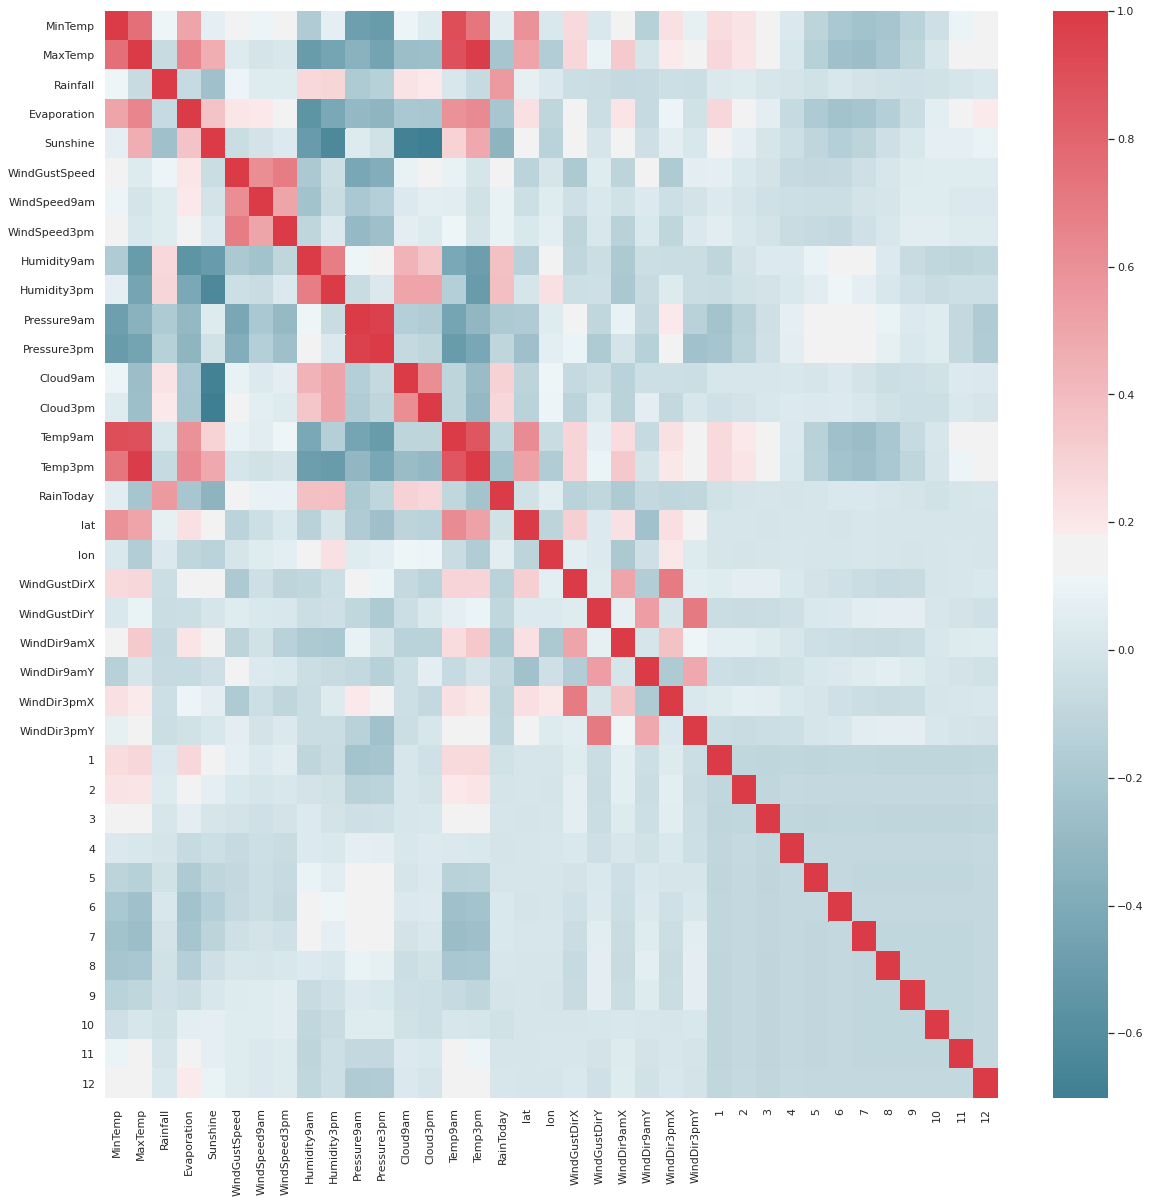

In [ ]:
# Relación entre las variables de entrada
corr = X_train.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(corr, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=False,fmt=".2f",linewidths=.0, ax=ax);

#### Análisis de features más importantes

Se observa a continuación el gráfico de la varianza explicada del dataset según el número de componentes del PCA. Se podría realizar una reducción de dimensionalidad con, por ejemplo, 10 componentes. Por cuestiones de tiempo, no se realizará en el presente trabajo.

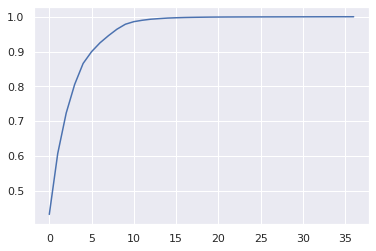

In [ ]:
# Análisis de features más importantes
sk_pca = PCA()
sk_pca.fit(X_train)

plt.plot(np.cumsum(sk_pca.explained_variance_ratio_)); plt.grid(True);

#### Normalización

In [ ]:
# Normalización de los datos a media cero y varianza unitaria
scaler = StandardScaler()
scaler.fit(X_train)

def zscore(X):
  return pd.DataFrame(scaler.transform(X))

X_train = zscore(X_train)

### 4. Entrenamiento de modelos

#### Preparación de los datos


In [ ]:
# (No ejecutar - Solo para desarrollo) 
# Datos de Entrenamiento (Re-ejecución de los pasos de la sección anterior)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2, stratify=y)
X_train, y_train = treat_missing_values(X_train, y_train)
location_encoding(X_train)
wind_dir_encoding(X_train)
date_encoding(X_train)
X_train = one_hot_encoding(X_train)
X_train, y_train = true_false_encoding(X_train, y_train)
X_train = zscore(X_train)

In [ ]:
# Datos de Test

# Retener muestras completas
X_test, y_test = treat_missing_values(X_test, y_test)

# Location encode
location_encoding(X_test)

# WindDir encode
wind_dir_encoding(X_test)

# Conservar solo el mes de la fecha
date_encoding(X_test)

# One hot encode
X_test = one_hot_encoding(X_test)

# Codificación de variables Yes/No
X_test, y_test = true_false_encoding(X_test, y_test)

# Scaling
X_test = zscore(X_test)

#### Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
sc = round(100*clf.score(X_test, y_test),2)
print("Accuracy: " + str(sc) + "%")

Accuracy: 85.48%


#### Random Forest

In [ ]:
clf2 = RandomForestClassifier(random_state=0).fit(X_train, y_train)

In [ ]:
sc2 = round(100*clf2.score(X_test, y_test),2)
print("Accuracy: " + str(sc2) + "%")

Accuracy: 86.28%


#### LGBM Classifier

In [ ]:
clf3 = LGBMClassifier().fit(X_train, y_train)

In [ ]:
sc3 = round(100*clf3.score(X_test, y_test),2)
print("Accuracy: " + str(sc3) + "%")

Accuracy: 86.52%


### Resultados

In [ ]:
# Resultados con LGBM Classifier (Mejor desempeño)
y_pred = clf3.predict(X_test)

truth       = y_test
prediction  = y_pred

TP = np.sum(truth & prediction)
TN = np.sum((truth == False) & (prediction == False))
FN = np.sum((truth == True) & (prediction == False))
FP = np.sum((truth == False) & (prediction == True))

print("TP: " + str(TP))
print("TN: " + str(TN))
print("FN: " + str(FN))
print("FP: " + str(FP))
print("\n")

precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("Accuracy: " + str(accuracy))

TP: 2129
TN: 12537
FN: 1592
FP: 693


Precision: 0.7544294826364281
Recall: 0.5721580220370868
Accuracy: 0.8651996932334376


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92     13230
        True       0.75      0.57      0.65      3721

    accuracy                           0.87     16951
   macro avg       0.82      0.76      0.78     16951
weighted avg       0.86      0.87      0.86     16951

